### Gaussian Discriminant Analysis (GDA)

- Assume two-classe case.


- $Q_k = ln(P(C_K)) - \frac{1}{2}(x-\mu_{K})^T\Sigma_{K}^{-1}(x-\mu_{K}) - \frac{1}{2}ln(|\Sigma_K|)$


- $\hat{y} = \begin{cases} Class\;0 \;\;\;\;, if \;Q_0(x) > Q_1(x) \\  Class\;1  \;\;\;\;, if \;Q_0(x) < Q_1(x) \\ DB  \;\;\;\; \;\;\;\;\;\;, if \;Q_0(x) = Q_1(x)\end{cases}$


- $P(C_0|x) = \frac{P(x|C_0)P(C_0)}{P(x|C_0)P(C_0)\;+\;P(x|C_1)P(C_1)} = \frac{1}{1+e^{-a}},\; a=ln(\frac{P(x|C_0)P(C_0)}{P(x|C_1)P(C_1)})$


- $P(C_1|x) = 1 - P(C_0|x)$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from utils import plot_DB, plot_DR
%matplotlib inline

In [2]:
X, y = make_blobs(n_samples=100, centers=2, n_features=2, cluster_std=2, random_state=20)

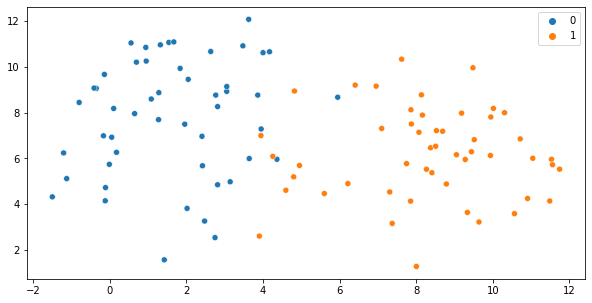

In [3]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y);

## GDA

In [4]:
class GDA:
    def __init__(self, model='LDA'):
        self.model = model
        
    
    def calculate_Q(self, x, prior, mu, sigma):
        return np.log(prior) - 0.5*(x - mu).dot(np.linalg.pinv(sigma)).dot((x - mu).T) - 0.5*np.linalg.det(sigma)

    def sigmoid(self, x):
        return 1/(1 + np.exp(-x))
    
    def fit(self, X, y):
        
        # split data
        X_0 = X[y==0]
        X_1 = X[y==1]
        # calculate classes means
        self.mu0 = X_0.mean(axis=0)
        self.mu1 = X_1.mean(axis=0)
        # calculate classes covariances
        self.sigma0 = np.cov(X_0[:, 0], X_0[:, 1])
        self.sigma1 = np.cov(X_1[:, 0], X_1[:, 1])
        if 'lda' in self.model.lower():
            self.sigma = self.sigma0 + self.sigma1
            self.sigma0 = self.sigma
            self.sigma1 = self.sigma
            
        # calculate the priors
        self.P_0 = len(X_0)/len(X)
        self.P_1 = len(X_1)/len(X)
        
        
    def predict(self, X, prob=False):
        if not prob:
            return np.array([np.argmax([
                self.calculate_Q(x, self.P_0, self.mu0, self.sigma0),
                self.calculate_Q(x, self.P_1, self.mu1, self.sigma1)
            ])for x in X])
        
        else:
            return np.array([
                self.sigmoid(
                    np.log(
                        self.calculate_Q(x, self.P_1, self.mu1, self.sigma0)*self.P_0/\
                        self.calculate_Q(x, self.P_0, self.mu0, self.sigma1)*self.P_1
                    )
                )
                for x in X
            ])

### 1) LDA

In [5]:
LDA = GDA('LDA')
LDA.fit(X, y)

In [7]:
acc = str(100*sum(LDA.predict(X)==y)/len(y))+'%'
print('Accuracy: {}'.format(acc))

Accuracy: 95.0%


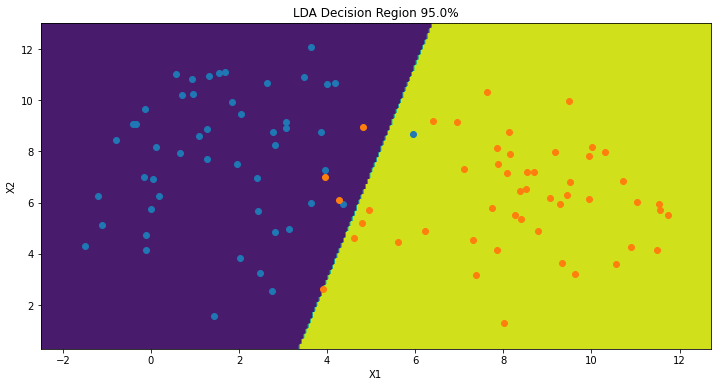

In [8]:
plot_DR(X, y, LDA, 'LDA Decision Region {}'.format(acc), h=0.05)

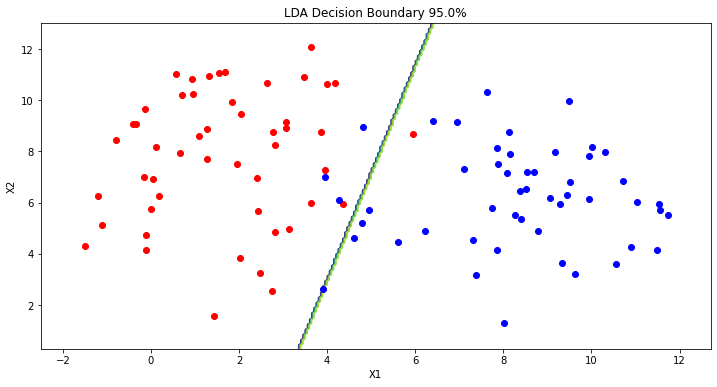

In [9]:
plot_DB(X, y, LDA, 'LDA Decision Boundary {}'.format(acc), h=0.05)

### 2) QDA

In [10]:
QDA = GDA('QDA')
QDA.fit(X, y)

In [13]:
acc = str(100*sum(QDA.predict(X)==y)/len(y))+'%'
print('Accuracy: {}'.format(acc))

Accuracy: 97.0%


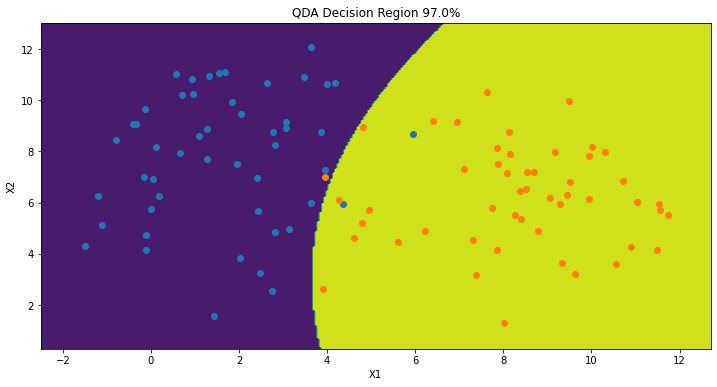

In [14]:
plot_DR(X, y, QDA, 'QDA Decision Region {}'.format(acc), h=0.05)

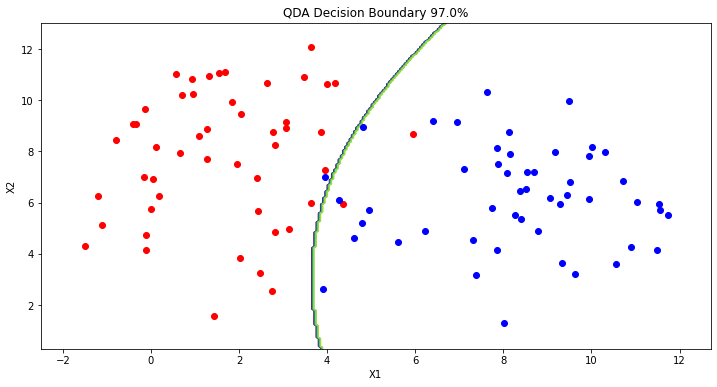

In [15]:
plot_DB(X, y, QDA, 'QDA Decision Boundary {}'.format(acc), h=0.05)

> - #### The QDA is more accurate than LDA.
> - #### In terms Bias-Variance decomposition, the QDA is more complex than the LDA and more prone to overfitting.